In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
load = pd.read_csv(r"loaddata/label/fiturbeban.csv") 
load = load.drop(load.columns[0], axis=1)
load.head()

,v_har,A_har,volt,current,activepower,reactivepower,apparentpower,Label
0,182.272720,0.104536,218.0,1.39,303.1,303.02,303.02,1
1,-0.387088,0.054437,218.0,1.39,303.1,303.02,303.02,1
2,-0.150628,0.033986,218.0,1.39,303.1,303.02,303.02,1
3,-0.227700,0.040327,218.0,1.39,303.0,303.02,303.02,1
4,-0.225902,0.043253,218.0,1.39,303.0,303.02,303.02,1


In [3]:
load.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   v_har           24000 non-null  float64
 1    A_har          24000 non-null  float64
 2    volt           24000 non-null  float64
 3    current        24000 non-null  float64
 4    activepower    24000 non-null  float64
 5    reactivepower  24000 non-null  float64
 6    apparentpower  24000 non-null  float64
 7   Label           24000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.5 MB


In [4]:
dg=load.groupby('Label').agg(['count', 'mean','std','min','max','median']).T
dg.to_csv('loaddata/c.csv')
dg

Label                            1            2            3            4  \
v_har          count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean       0.044120     0.045600     0.045840     0.045280   
               std        2.882052     2.872520     2.896089     2.850185   
               min       -0.387088    -0.159879    -0.120675    -0.462020   
               max      182.272720   181.672620   183.164280   180.253700   
               median    -0.000813    -0.000168    -0.000029    -0.000199   
 A_har         count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean       0.000280     0.000232     0.000012     0.000008   
               std        0.003342     0.007280     0.004474     0.006759   
               min       -0.024457    -0.041908    -0.086744    -0.140225   
               max        0.104536     0.434290     0.243896     0.243808   
               median     0.000138     0.000120     0.000000     0.000041   
 volt          count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean     226.798400   227.166575   228.919525   225.293875   
               std        3.193488     1.664639     0.626969     2.856565   
               min      218.000000   216.700000   227.300000   217.900000   
               max      229.800000   231.900000   230.800000   228.100000   
               median   228.100000   227.300000   228.900000   226.300000   
 current       count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean       0.287392     0.665232     0.304878     0.307067   
               std        0.523821     0.550307     0.180874     0.588744   
               min        0.040000     0.040000     0.060000     0.030000   
               max        1.410000     3.320000     0.480000     1.640000   
               median     0.040000     1.120000     0.440000     0.040000   
 activepower   count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean      57.243575    76.050625    41.330675    60.874025   
               std      118.158260    66.369381    28.783065   131.726667   
               min        1.300000     1.100000     2.300000     0.800000   
               max      312.300000   586.200000    70.900000   360.300000   
               median     1.400000   129.400000    61.900000     0.900000   
 reactivepower count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean      63.546849   150.739525    69.711536    67.531604   
               std      115.215562   124.651713    41.318002   128.863789   
               min        9.048000     9.020000    13.710000     6.744000   
               max      313.161000   726.084000   109.536000   361.128000   
               median     9.140000   251.664000   100.320000     9.068000   
 apparentpower count   4000.000000  4000.000000  4000.000000  4000.000000   
               mean      57.412351    76.164034    41.170587    60.937407   
               std      118.107686    66.335075    28.782987   131.696494   
               min        1.460480     1.177800     2.062800     0.677100   
               max      313.161000   588.128040    71.198400   361.128000   
               median     1.643760   129.840390    62.225680     0.997480   

Label                            5            6  
v_har          count   4000.000000  4000.000000  
               mean       0.045580     0.042780  
               std        2.900610     2.702505  
               min       -0.122259    -0.261664  
               max      183.449680   170.920580  
               median    -0.000335     0.000126  
 A_har         count   4000.000000  4000.000000  
               mean       0.000036     0.000656  
               std        0.003020     0.041524  
               min       -0.006648    -0.004431  
               max        0.186684     2.626162  
               median    -0.000019     0.000001  
 volt          count   4000.000000  40

In [5]:
load_copy=load.copy(deep=True)
load_copy=load_copy.iloc[:, 0:7]
print(load_copy.isnull().sum())

v_har             0
 A_har            0
 volt             0
 current          0
 activepower      0
 reactivepower    0
 apparentpower    0
dtype: int64


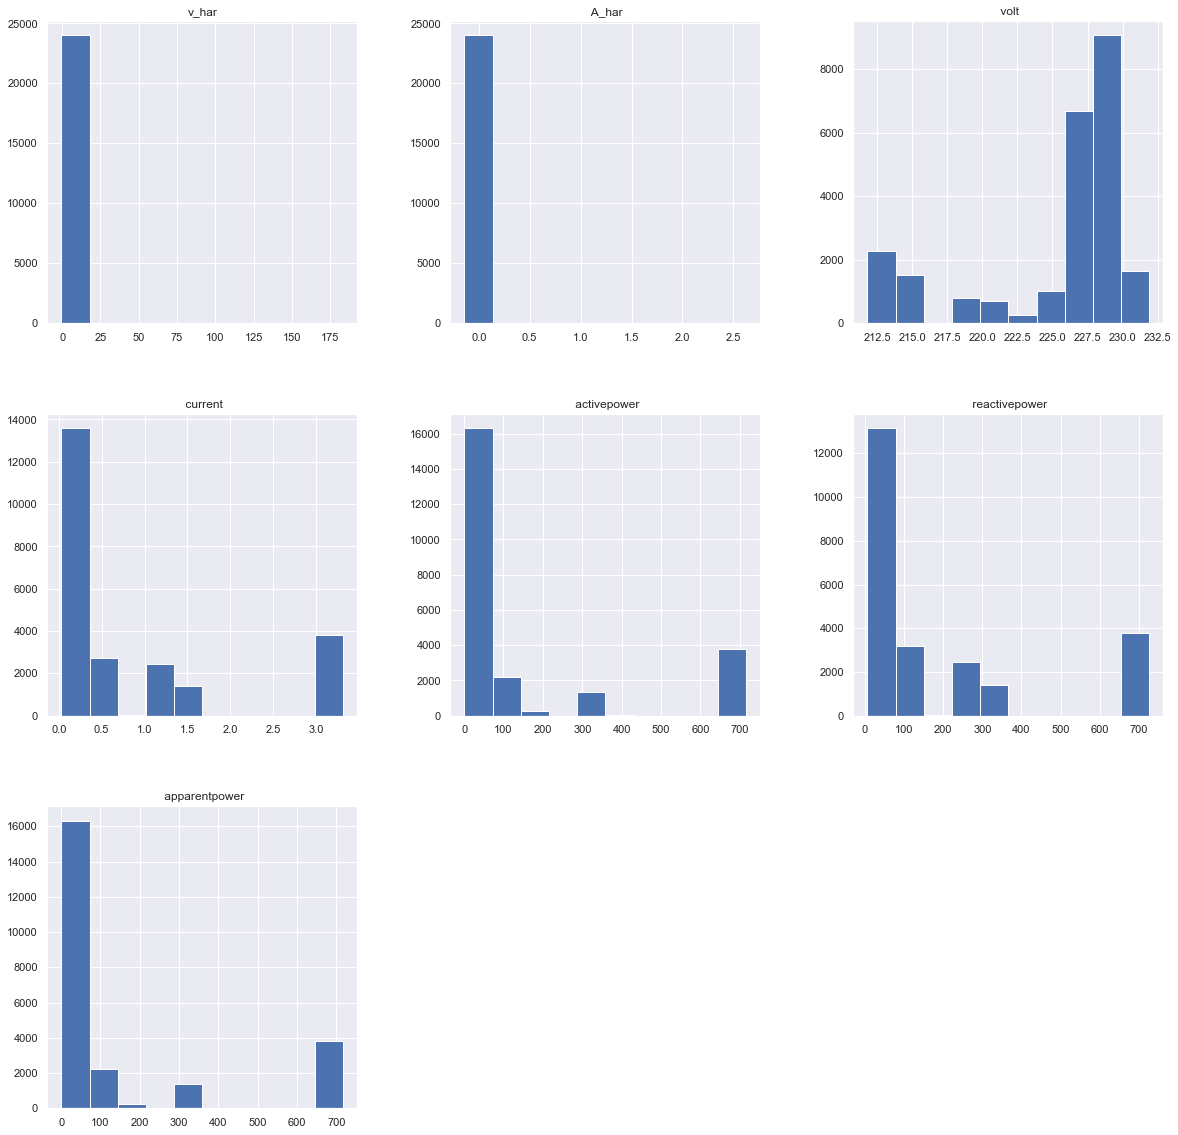

In [6]:
px=load_copy.hist(figsize=(20,20))

In [7]:
load.shape

(24000, 8)

AxesSubplot(0.125,0.125;0.775x0.755)


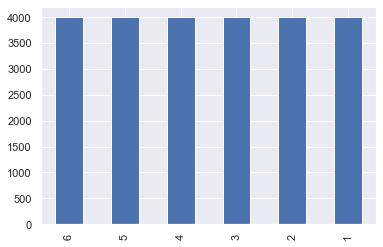

In [8]:
print(load.Label.value_counts().plot(kind='bar'))

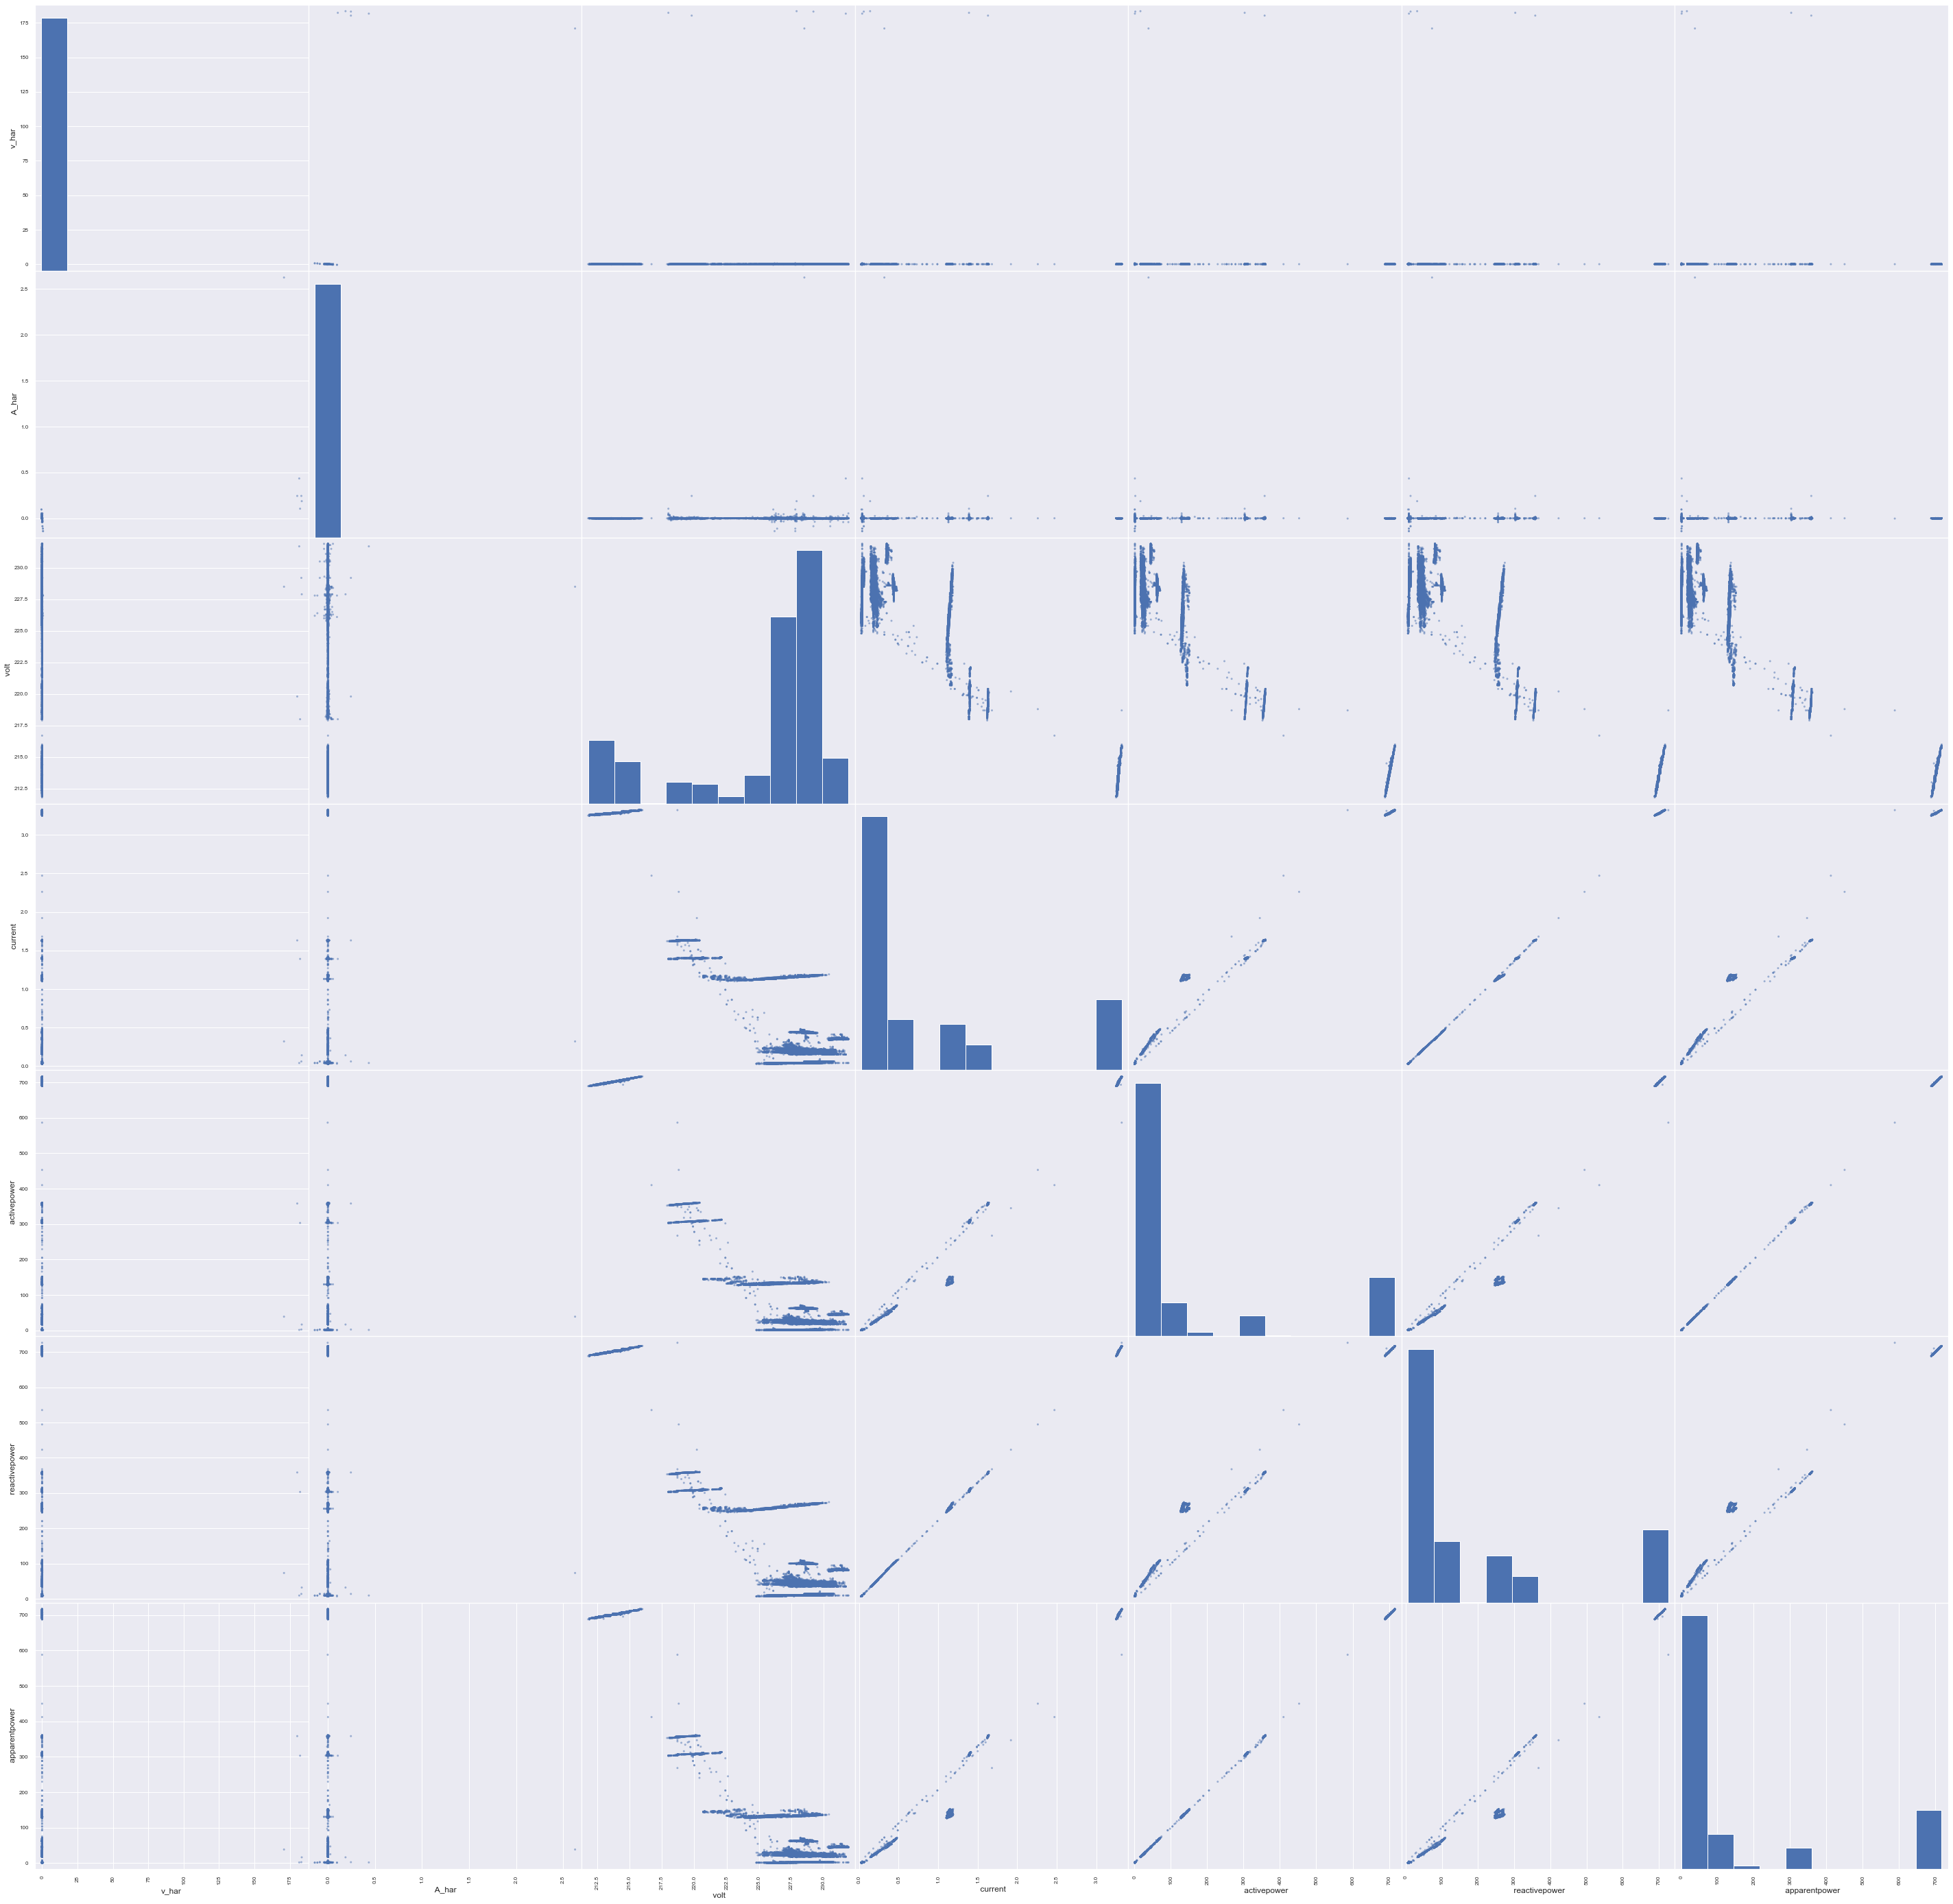

In [9]:
from pandas.plotting import scatter_matrix
sc=scatter_matrix(load_copy,figsize=(50,50))

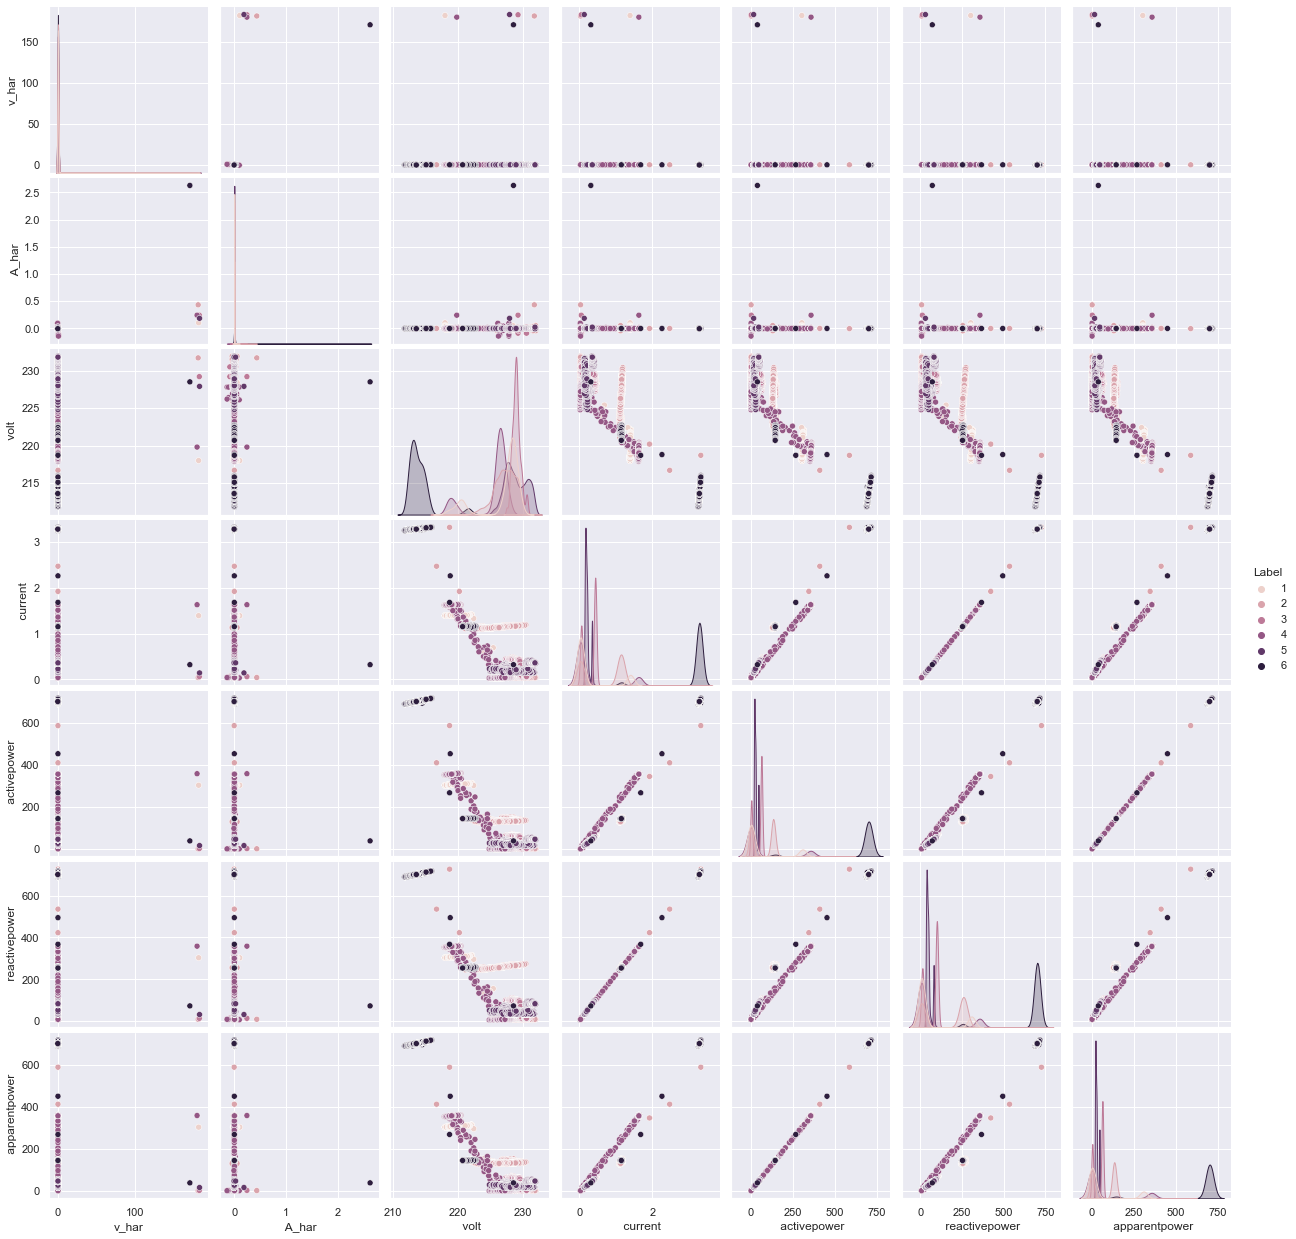

In [10]:
p=sns.pairplot(load, hue = 'Label')

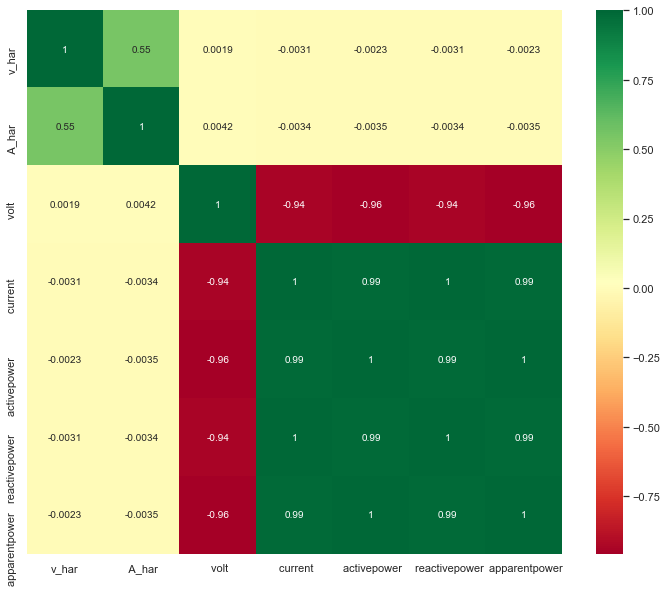

In [11]:
plt.figure(figsize=(12,10))
p=sns.heatmap(load_copy.corr(), annot=True, cmap='RdYlGn')

In [12]:
from sklearn.preprocessing import StandardScaler
scX=StandardScaler()
X=pd.DataFrame(scX.fit_transform(load_copy),
    columns=['v_har', 'A_har', 'volt', 'current', 'activepower', 'reactivepower','apparentpower'])

In [13]:
X.head()

,v_har,A_har,volt,current,activepower,reactivepower,apparentpower
0,63.914447,5.920825,-1.292387,0.490024,0.588672,0.500037,0.587955
1,-0.151503,3.077714,-1.292387,0.490024,0.588672,0.500037,0.587955
2,-0.068568,1.917123,-1.292387,0.490024,0.588672,0.500037,0.587955
3,-0.095600,2.276974,-1.292387,0.490024,0.588272,0.500037,0.587955
4,-0.094969,2.443024,-1.292387,0.490024,0.588272,0.500037,0.587955


In [14]:
y=load.Label

In [15]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [17]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [18]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.775 % and k = [1]


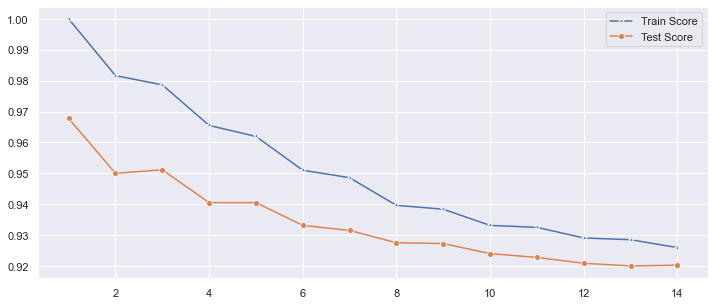

In [19]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [20]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.96775

In [21]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16000, 7) (16000,)
(8000, 7) (8000,)


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,1260,52,0,21,0,0,1333
2,62,1209,5,53,0,4,1333
3,0,1,1329,0,3,0,1333
4,9,42,0,1279,4,0,1334
5,0,0,1,1,1332,0,1334
6,0,0,0,0,0,1333,1333
All,1331,1304,1335,1354,1339,1337,8000


Text(0.5, 12.5, 'Predicted label')

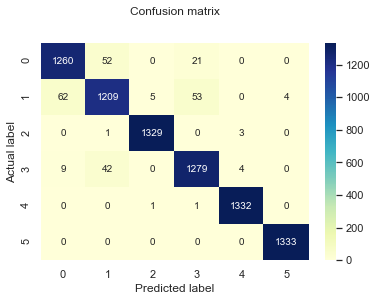

In [23]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      1333
           2       0.93      0.91      0.92      1333
           3       1.00      1.00      1.00      1333
           4       0.94      0.96      0.95      1334
           5       0.99      1.00      1.00      1334
           6       1.00      1.00      1.00      1333

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000



In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9039166666666667
Best Parameters: {'n_neighbors': 1}


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9039166666666667
Best Parameters: {'n_neighbors': 1}


In [ ]:

from matplotlib.colors import ListedColormap

n_neighbors = 1
X = X.iloc [:, 0:2]

h = .01  
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    ar= np.array(X.iloc[:, 0])
    ad=np.array(X.iloc[:, 1])
    x_min, x_max = ar.min() - 1, ar.max() + 1
    y_min, y_max = ad.min() - 1, ad.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(ar, ad, c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()